## Τι είναι τα models στο Data Science;

Με μία απλή πρόταση είναι μοντέλα φτιάχνοντε ώστε να μπορούμε να κάνουμε προβλέψεις για μια τάση που ερευνούμε.

Υπάρχουν δύο κατηγορίες μοντέλων τα **supervised** που τα εκπαιδεύουμε εμείς και στα unsupervised που γίνεται μέσω neural networks.

Στο άρθρο θα ασχοληθούμε με την πρώτη κατηγορία που έχει 3 υποκατηγορίες **regression, classification και decision tree**.

Όταν χρησιμοποιούμε regression δύο από τις ποιό γνωστές κατηγορίες είναι η linear που προσπαθούμε με μία ευθεία γραμμή να περάσουμε από ολα τα  σημεία των τιμών και η polynomial που αναλόγως τον βαθμό της μπορούμε να χρησιμοποιήσουμε πολλαπλές παράμετρους ώστε να πλησιάζει περισσότερα σημεία.

Το πρόβλημα που δημιουργείται πολλές φορές είναι η σωστή ισορροπία καθότι όσο πιο πολύ ταιριάζει το μοντέλο στα σημεία υπάρχει μεγαλύτερη πιθανότητα μελλοντικά σημεία να έχουν μεγαλύτερη απόκλιση και έτσι  έχουμε overfitting, underfitting είναι όταν  το  μοντέλο δεν περνάει απο τα περισσότερα σημεία τότε ίσως  θα πρέπει να αλλάξουμε είδος μοντέλου ή να αυξήσουμε τα degrees/folds.

To κάθε μοντέλο χρειάζεται να γίνει train στην αρχή με ένα ποσοστό δεδομένων και  το υπόλοιπο  ποσοστό χρησιμοποιείται για test.

Το πόσο ακριβές είναι το μοντέλο διακρίνεται με τις τιμές του R^2(πόσο μικρή απόκληση έχουν οι τιμές από την γραμμή του  μοντέλου) με τιμές από 0~1 και RMSE(το τετράγωνο του μέσου όρου της διαφοράς το προβλεπόμενων τιμών απο τις πραγματικές) με τιμές πάνω απο  το μηδέν και όταν λέμε μηδέν σημαίνει ότι έχουμε το τέλειο μοντέλο που το θέτει ως  αδύνατον.

Πάμε να δούμε αναλυτικά...

Για αρχή θα φορτώσω όλες τις βιβλιοθήκες που ίσως χρειαστώ ώστε να μην μπλέξουμε μετά.

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures


import seaborn as sns


%matplotlib inline
#!conda install -c anaconda seaborn -y

Φορτώνουμε σε ένα dataframe ένα csv με στοιχειά αυτοκινήτων, κρατάμε όσες στείλες θέλουμε και κάνουμε και μία τροποποίηση ώστε να έχουμε την μέση κατανάλωση.

In [458]:
df = pd.read_csv('https://gist.githubusercontent.com/str4t3gos/acd3354f30ecc1e7cb90caee84650c3a/raw/61adad1fca973303f4af8bc378b3a5432b7371e7/autos_csv.csv')
df = df[['make','fuel-type','horsepower','city-mpg','highway-mpg','price']]
df['AVG-mpg'] = (df['city-mpg']+df['highway-mpg'])/2
dff = df[['make','fuel-type','horsepower','AVG-mpg','price']]
dff.head()

,make,fuel-type,horsepower,AVG-mpg,price
0,alfa-romero,gas,111.0,24.0,13495.0
1,alfa-romero,gas,111.0,24.0,16500.0
2,alfa-romero,gas,154.0,22.5,16500.0
3,audi,gas,102.0,27.0,13950.0
4,audi,gas,115.0,20.0,17450.0


Ας φτιάξουμε ένα γρήγορο bar plot με το κόστος άνα μάρκα.

Θέλει μόνο 5 γραμμές εντολών...

<BarContainer object of 205 artists>

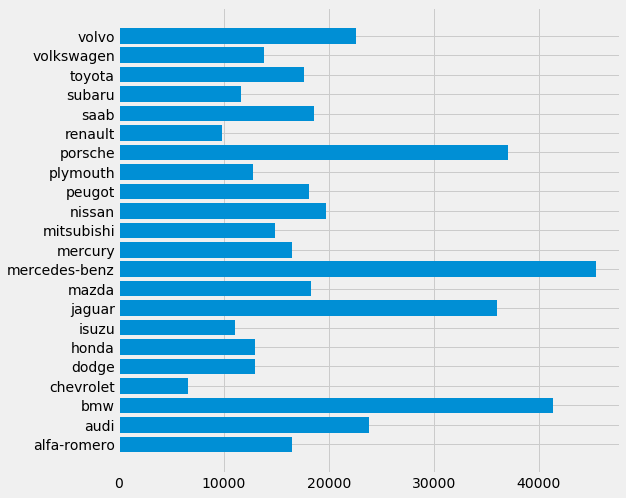

In [459]:

makers = dff['make']
prices = dff['price']
fig, ax = plt.subplots(figsize=(8, 8))
plt.style.use('fivethirtyeight')
ax.barh(makers, prices)


Επειδή είχαμε κείμενο στο τι καύσιμο έχει το κάθε όνομα θα φτιάξουμε καινούργιες στήλες μία για πετρέλαιο και μία για βενζίνη με 0 ή 1 ανάλογα το τι έχει με την εντολή .get_dummies και για να περάσει η αλλαγή χρειάζεται την παράμετρο inplace=True

In [460]:
dff = pd.concat([dff,pd.get_dummies(dff['fuel-type'])], axis=1)
#dff = pd.concat([dff,pd.get_dummies(dff['make'])], axis=1)
dff.drop(['fuel-type'], axis = 1,inplace=True)
#dff.drop(['make'], axis = 1,inplace=True)
dff.head()

,make,horsepower,AVG-mpg,price,diesel,gas
0,alfa-romero,111.0,24.0,13495.0,0,1
1,alfa-romero,111.0,24.0,16500.0,0,1
2,alfa-romero,154.0,22.5,16500.0,0,1
3,audi,102.0,27.0,13950.0,0,1
4,audi,115.0,20.0,17450.0,0,1


Τώρα θα γεμίσουμε σε όσα αυτοκίνητα δεν έχουν τιμή μια μέση τιμή απο τα υπόλοιπα.

In [461]:
X = dff[dff.columns.difference(['price'])]
X =X.fillna(X.mean())
X.head()


,AVG-mpg,diesel,gas,horsepower,make
0,24.0,0,1,111.0,alfa-romero
1,24.0,0,1,111.0,alfa-romero
2,22.5,0,1,154.0,alfa-romero
3,27.0,0,1,102.0,audi
4,20.0,0,1,115.0,audi


In [462]:
y = dff[['price']]
y =y.fillna(y.mean())
y[0:5]

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


Μέσα από την βιβλιοθήκη seaborn κάνουμε ένα γρήγορο linear regression plot ώστε να δούμε πως αυξάνεται το κόστος ως προς την ιπποδύναμη με μόνο μία γραμμή κώδικα.

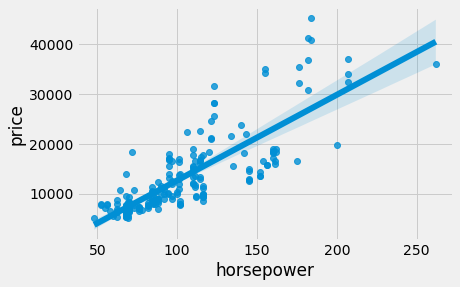

In [463]:
ax = sns.regplot(x='horsepower', y='price', data=dff)

Φτιάχνουμε 2 functions ώστε μπορούμε γρήγορα και εύκολα να φτιάξουμε τα γραφήματα.

In [464]:
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title ):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    plt.title(Title)
    plt.xlabel('Τιμή σε δολλάρια')
    plt.ylabel('Χαρακτηριστικά')
    plt.show()
    plt.close()

In [465]:
def PollyPlot(xtrain,xtest,y_train,y_test,lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    xmax=max([xtrain.values.max(),xtest.values.max()])
    xmin=min([xtrain.values.min(),xtest.values.min()])
    x=np.arange(xmin,xmax,0.1)
    plt.plot(xtrain,y_train,'ro',label='Training δεδομένα')
    plt.plot(xtest,y_test,'go',label='Test δεδομένα')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Προβλεπόμενα')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()

Χωρίζουμε τα δεδομένα σε training και test με ποσοστό 70-30.

In [466]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

#X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
#X_train[0:5]
#X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
#X_test[0:5]

#y_train = preprocessing.StandardScaler().fit(y_train).transform(y_train.astype(float))
#y_train[0:5]
#y_test = preprocessing.StandardScaler().fit(y_test).transform(y_test.astype(float))
#y_test[0:5]

number of test samples : 62
number of training samples: 143


Ορίζουμε σε μια μεταβλητή την κλάση που θα χρησιμοποιήσουμε και ξεκινάμε το training με τα δεδομένα. Έπειτα με το score βλέπουμε ότι το R^2 είναι 0.33 που δείχνει ότι η γραμμή δεν περνάει από τα περισσότερα σημεία.

In [467]:
lre = LinearRegression()
lre.fit(X_train[['horsepower']],y_train)
lre.score(X_test[['horsepower']],y_test)

0.3331272902078515

Μπορούμε να κάνουμε cross validate to score με τον κάτωθι τρόπο χωρίζοντας τα δεδομένα σε 4 κομμάτια και τεστάροντας το καθένα ξεχωριστά.

In [468]:

Rcross=cross_val_score(lre,X[['horsepower']], y,cv=4)
print("The mean of the folds are", Rcross.mean(),"and the standard deviation is" ,Rcross.std())


The mean of the folds are 0.4392710840512933 and the standard deviation is 0.16681254993011282


Πάμε να δοκιμάσουμε να φτιάξουμε ένα μοντέλο που να προβλέπει την τιμή από τα χαρακτηριστικά  του  αυτοκινήτου.

In [469]:

lre = LinearRegression()
lre.fit(X_train[['horsepower', 'AVG-mpg', 'diesel', 'gas']],y_train)
lre.score(X_test[['horsepower', 'AVG-mpg', 'diesel', 'gas']],y_test)



0.40859095219326313

Ορίζουμε τις προβλεπόμενες τιμές ως yhat. 

In [472]:
yhat_train=lre.predict(X_train[['horsepower', 'AVG-mpg', 'diesel', 'gas']])
yhat_train[3:7]



array([[21400.06711013],
       [ 9861.84714747],
       [ 4442.33687254],
       [ 5784.42153314]])

Βλέπουμε ότι δεν είχαμε καλή  ακρίβεια στο μοντέλο μας

In [473]:
yhat_test=lre.predict(X_test[['horsepower', 'AVG-mpg', 'diesel', 'gas']])
yhat_test[3:7]


array([[ -995.04541995],
       [11522.93001182],
       [14350.0754735 ],
       [ 4490.81039275]])

Ας κάνουμε και γραφήματα για  την ακρίβεια.

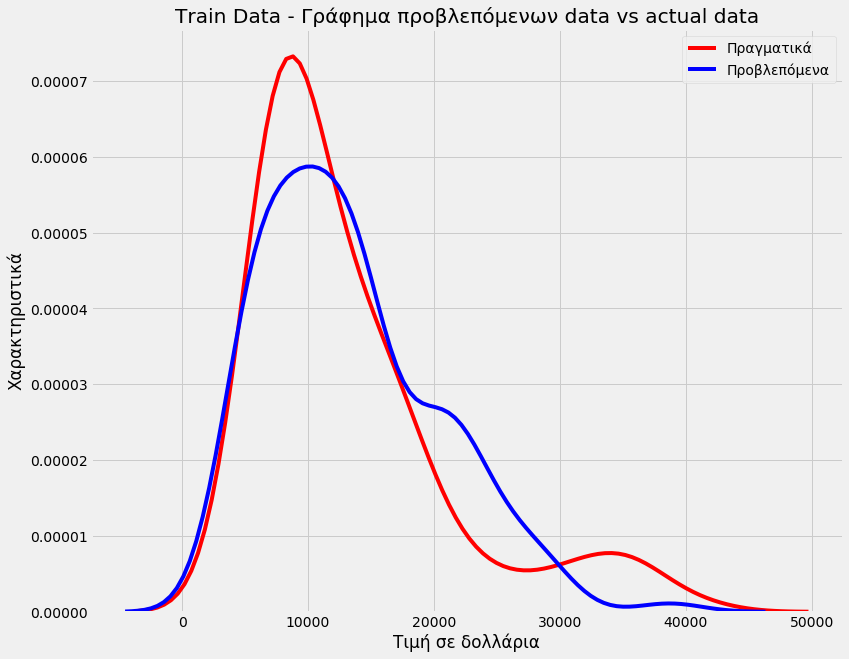

In [432]:
Title='Train Data - Γράφημα προβλεπόμενων data vs actual data'
DistributionPlot(y_train,yhat_train,"Πραγματικά","Προβλεπόμενα",Title)

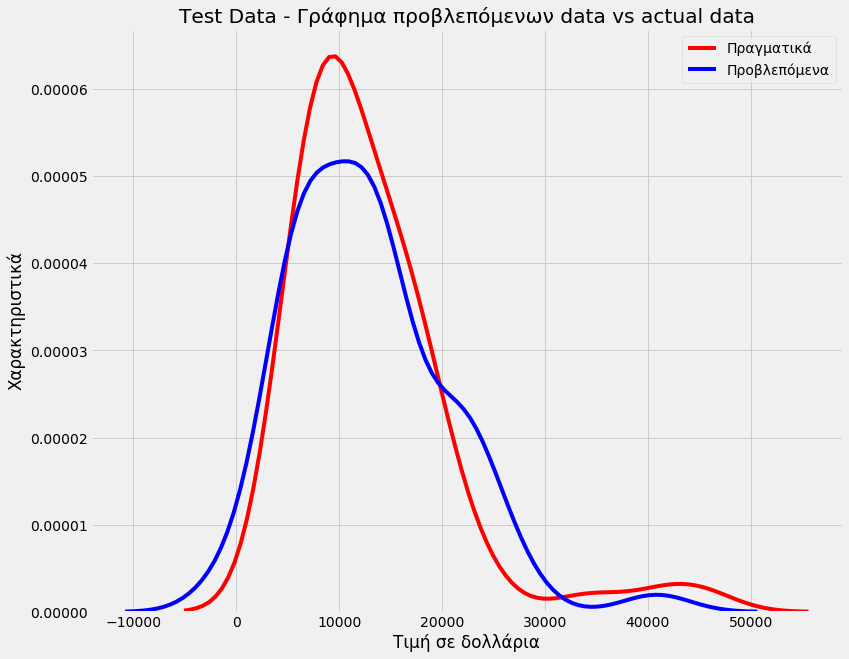

In [433]:
Title='Test Data - Γράφημα προβλεπόμενων data vs actual data'
DistributionPlot(y_test,yhat_test,"Πραγματικά","Προβλεπόμενα",Title)

Πάμε σε polynomial 5 βαθμού να δούμε αν θα  έχουμε κάτι καλύτερο. Αυτή την φορά μόνο με τους ίππους.

In [480]:

pr=PolynomialFeatures(degree=5)
X_train_pr=pr.fit_transform(X_train[['horsepower']])
X_test_pr=pr.fit_transform(X_test[['horsepower']])


In [481]:
poly = LinearRegression()
poly.fit(X_train_pr, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [482]:
yhat=poly.predict(X_test_pr)

In [483]:
print("Προβλεπόμενες τιμές:", yhat_test[0:4])
print("Πραγματικές τιμές:",y_test[0:4].values)

Προβλεπόμενες τιμές: [[ 5524.18191454]
 [21532.75818567]
 [14610.3150921 ]
 [ -995.04541995]]
Πραγματικές τιμές: [[ 6795.]
 [15750.]
 [15250.]
 [ 5151.]]


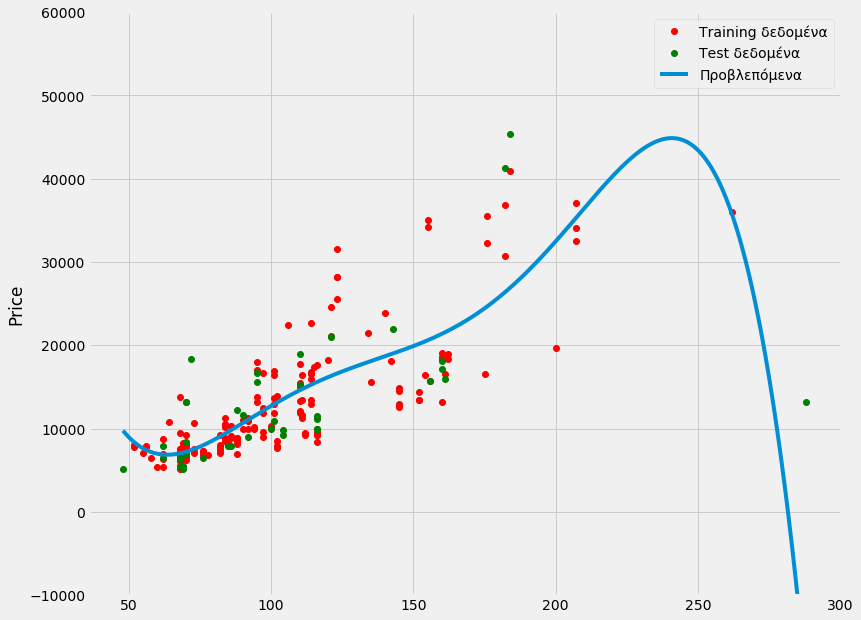

In [402]:
PollyPlot(X_train[['horsepower']],X_test[['horsepower']],y_train,y_test,poly,pr)

Βλέπουμε μια βελτίωση.

In [437]:
poly.score(X_train_pr, y_train)

0.6830658437904327

In [438]:
poly.score(X_test_pr, y_test)


0.2592262204123108

Μπορούμε να φτιάξουμε ένα loop που δοκιμάζει την διαδικασία με διαφορετικούς βαθμούς ώστε να επιλέξουμε το καλύτερο.

Text(3, 0.75, 'Maximum R^2 ')

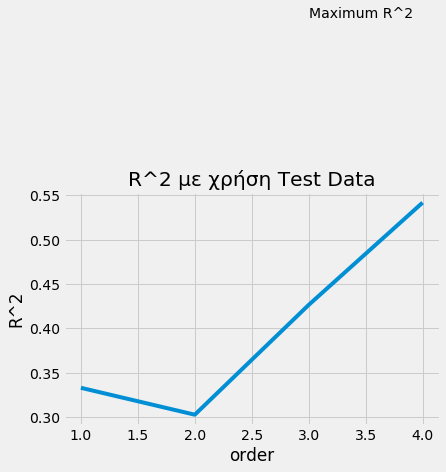

In [441]:
Rsqu_test=[]
order=[1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    
    X_train_pr=pr.fit_transform(X_train[['horsepower']])
    
    X_test_pr=pr.fit_transform(X_test[['horsepower']])    
    
    lre.fit(X_train_pr,y_train)
    
    Rsqu_test.append(lre.score(X_test_pr,y_test))

plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 με χρήση Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

Κάνουμε και μια τελευταία δοκιμή με το rigde model να δούμε αν θα έχουμε ακόμα καλύτερη ακρίβεια.

In [485]:
pr=PolynomialFeatures(degree=2)
X_train_pr=pr.fit_transform(X_train[['horsepower', 'AVG-mpg', 'diesel', 'gas']])
X_test_pr=pr.fit_transform(X_test[['horsepower', 'AVG-mpg', 'diesel', 'gas']])
RigeModel=Ridge(alpha=0.01)
RigeModel.fit(X_train_pr, y_train)
yhat=RigeModel.predict(X_test_pr)

print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [[ 6807.95323245]
 [20468.43090602]
 [14849.82259996]
 [10178.31016628]]
test set : [[ 6795.]
 [15750.]
 [15250.]
 [ 5151.]]


In [492]:
Rsqu_test=[]
Rsqu_train=[]
dummy1=[]
ALFA=5000*np.array(range(0,2))
for alfa in ALFA:
    RigeModel=Ridge(alpha=alfa) 
    RigeModel.fit(X_train_pr,y_train)
    Rsqu_test.append(RigeModel.score(X_test_pr,y_test))
    Rsqu_train.append(RigeModel.score(X_train_pr,y_train))

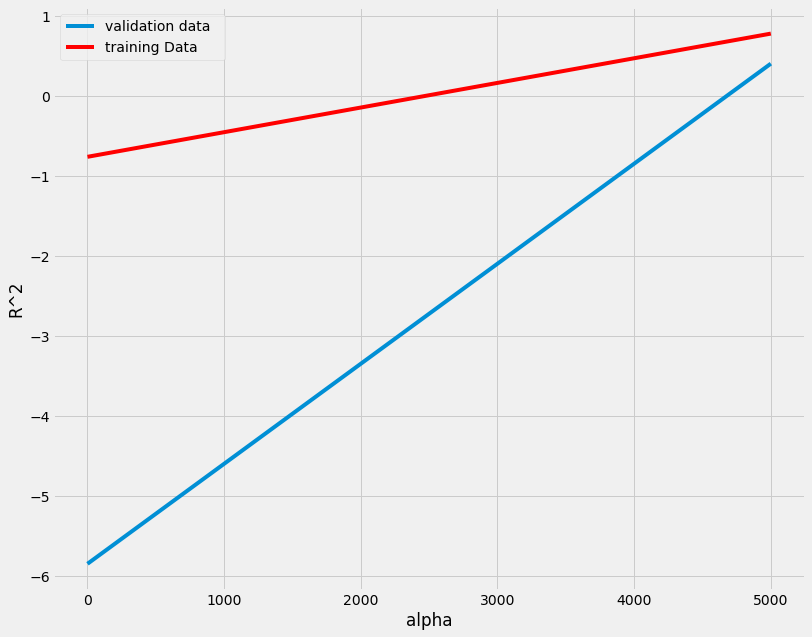

In [493]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test,label='validation data  ')
plt.plot(ALFA,Rsqu_train,'r',label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Έπειτα από ένα TLDR post νομίζω θα πείρατε μία μεγάλη ιδεά, σίγουρα θα σας φαίνονται δύσκολα και πολύπλοκα αλλά με την χρήση και την εμπειρία λόγο  του  ότι ο κώδικας που  απαιτείται  είναι λίγων γραμμών η καθημερινή χρήση τους θα είναι εύκολη.